In [ ]:
|   Пункт расходов          |   Ориентировочные затраты (доллары США)   |
|-----------------------|--------------------|
| Исследования и разработка (R&D)      | $100,000 - $500,000+     |
| Вычислительные ресурсы и оборудование      | $20,000 - $100,000+    |
| Данные      | $10,000 - $50,000+    |
| Команда специалистов     | $200,000 - $1,000,000+ per år    |
| Инфраструктура IT     | $20,000 - сумма в несколько сотен тысяч и выше   |
| Маркетинг и продвижение     | $10,000 - $100,000+ per år    |
| Бюрократические расходы     | $10,000 - $50,000+ per år    |
| Резервы и неожиданные затраты    | 10-20% от общего бюджета    |

In [22]:
import nibabel as nib
import nilearn as nil
import scipy.ndimage as ndi
import matplotlib.pyplot as plt
import os
import torch
from PIL import Image
import numpy as np

In [6]:
test_f = "/home/elena/Study/Generium/datasets/sklerosis/bt_dataset/files/1-Flair.nii"


In [7]:
brain_vol = nib.load(test_f)

In [9]:
print(brain_vol.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b'          '
db_name         : b'                  '
extents         : 16384
session_error   : 0
regular         : b'r'
dim_info        : 32
dim             : [  3 256 256  23   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float64
bitpix          : 64
slice_start     : 0
pixdim          : [1. 1. 1. 1. 0. 0. 0. 0.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 0
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'                                                                                '
aux_file        : b'                        '
qform_code      : unknown
sform_code      : unknown
quatern_b       : 0.0
quatern_c       : 0.0
quate

In [13]:
brain_vol_data = brain_vol.get_fdata()
type(brain_vol_data)

numpy.memmap

In [16]:
brain_vol_data.shape

(256, 256, 23)

In [28]:
brain_vol_data_torch = torch.from_numpy(brain_vol.get_fdata())
brain_vol_data_torch = brain_vol_data_torch.permute(2, 0, 1)
brain_vol_data_torch.shape

torch.Size([23, 256, 256])

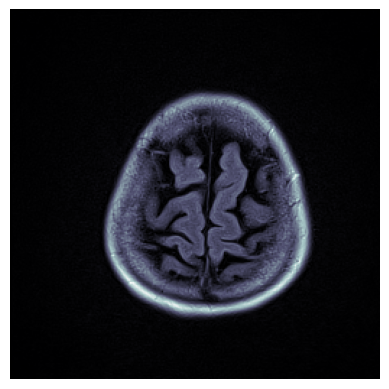

In [39]:
for ind in range(len(brain_vol_data_torch)):
    plt.imshow(brain_vol_data_torch[ind], cmap='bone')
    plt.axis('off')
    plt.savefig(f"/home/elena/Study/Generium/datasets/sklerosis/bt_dataset/images/1/{ind}.jpg")

In [41]:
frames = []
for frame_number in range(len(brain_vol_data_torch)):
    # Открываем изображение каждого кадра.
    frame = Image.open(f'/home/elena/Study/Generium/datasets/sklerosis/bt_dataset/images/1/{frame_number}.jpg')
    # Добавляем кадр в список с кадрами.
    frames.append(frame)

# Берем первый кадр и в него добавляем оставшееся кадры.
frames[0].save(
    '/home/elena/Study/Generium/datasets/sklerosis/bt_dataset/images/homer.gif',
    save_all=True,
    append_images=frames[1:],  # Срез который игнорирует первый кадр.
    optimize=True,
    duration=100,
    loop=0
)

(-0.5, 255.5, 255.5, -0.5)

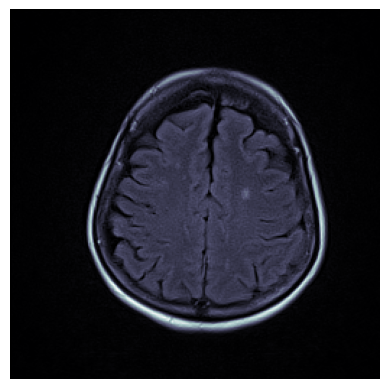

In [54]:
plt.imshow(brain_vol_data_torch[18], cmap='bone')
plt.axis('off')

In [18]:
img_data_arr = np.asarray(brain_vol.get_fdata())

img = Image.fromarray(img_data_arr_norm[:,:,0], 'L')
# img.save("image.jpeg")
plt.imshow(img, cmap='bone')
plt.axis('off')
plt.show()

NameError: name 'np' is not defined

In [3]:
! pip install pydicom


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [18]:
import numpy as np
import pandas as pd
import os
from pathlib import Path
import pydicom
import random
import matplotlib.pyplot as plt

In [45]:
def show_image(image_path):
    dcm_img = pydicom.dcmread(img_path, force=True)
    img_array = dcm_img.pixel_array

    plt.imshow(img_array)
    # if label == 0:
    #     category = "doesn't have cancer"
    # elif label == 1:
    #     category = "has cancer"

#     plt.title(f'Recist example dataset 1');
    return dcm_img

In [7]:
img_path = "/home/elena/Study/Generium/datasets/recist/manifest-1646429317311/StageII-Colorectal-CT/StageII-Colorectal-CT-001/09-14-2003-NA-Abdomen CT RoutineEnhanced-11625/5.000000-Venous Phase  5.0  B30f-12095/1-01.dcm"
dcm_img = pydicom.dcmread(img_path, force=True)
dcm_img

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 206
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.197330249480515651730160191242200934497
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.3.6.1.4.1.22213.1.143
(0002, 0013) Implementation Version Name         SH: '0.5'
(0002, 0016) Source Application Entity Title     AE: 'POSDA'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL', 'CT_SOM5 SPI']
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.2.1.1

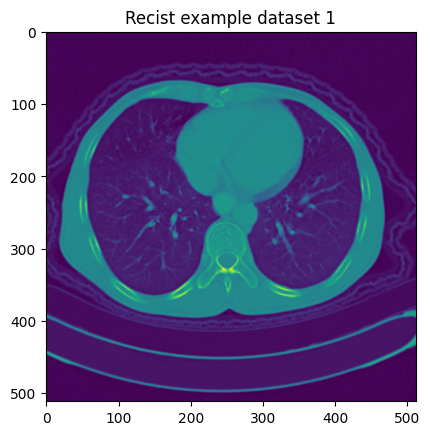

In [12]:
img_array = dcm_img.pixel_array

plt.imshow(img_array)
# if label == 0:
#     category = "doesn't have cancer"
# elif label == 1:
#     category = "has cancer"

plt.title(f'Recist example dataset 1');

In [38]:
def random_9img_sample(
    image_paths
):
    """Function that shows 9 random images with labels and their img sizes"""
#     df_sample = df.sample(9, random_state=random_state).reset_index()
    images_sample_paths = random.sample(image_paths , 9)
    fig, ax = plt.subplots(3, 3, figsize=(14, 14))
    
    for idx_num, image_path in enumerate(images_sample_paths):
#         img_id = str(row['image_id'])
#         full_img_id = img_id + '.dcm'
#         pat_id = str(row['patient_id'])

#         label = row['cancer']

#         img_path = os.path.join(base_img_dir, pat_id, full_img_id)
        q, r = divmod(idx_num, 3)
        
        print(q, r, image_path)
        img_array = pydicom.dcmread(image_path, force=True).pixel_array
        
        
        ax[q][r].imshow(img_array)
#         ax[q][r].set_title(f'Image label is: {label}')

In [21]:
image_path = []
for p,d,f in os.walk("datasets/recist/manifest-1646429317311"):
    for file in f:
        if file.split('.')[-1] == 'dcm':
            image_path.append(os.path.join(p,file))
print(len(image_path))

1436


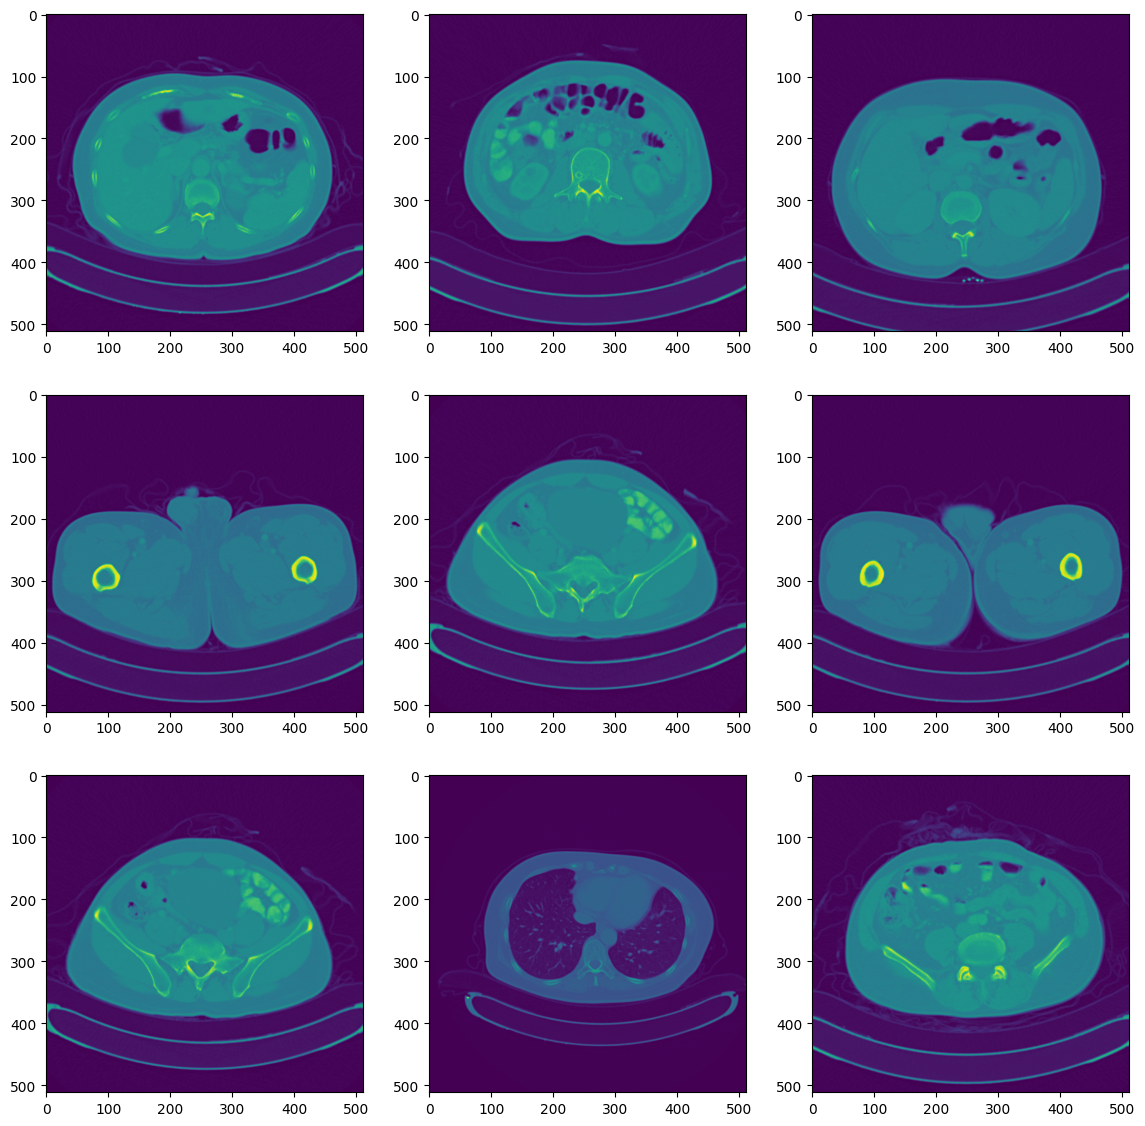

In [31]:
random_9img_sample(image_path)

In [32]:
image_path = []
for p,d,f in os.walk("datasets/sklerosis/manifest-1709513138035/CMB-CRC/CMB-CRC-MSB-00352"):
    for file in f:
        if file.split('.')[-1] == 'dcm':
            image_path.append(os.path.join(p,file))
print(len(image_path))

577


0 0 datasets/sklerosis/manifest-1709513138035/CMB-CRC/CMB-CRC-MSB-00352/12-19-1959-NA-PETCTSkullMidThigh-97248/9.000000-ax lung mip-83985/1-66.dcm
0 1 datasets/sklerosis/manifest-1709513138035/CMB-CRC/CMB-CRC-MSB-00352/12-19-1959-NA-PETCTSkullMidThigh-97248/10.000000-cor lung-18168/1-034.dcm
0 2 datasets/sklerosis/manifest-1709513138035/CMB-CRC/CMB-CRC-MSB-00352/12-10-1959-NA-CTCAP-95705/1005.000000-CORONAL AP-13059/1-082.dcm
1 0 datasets/sklerosis/manifest-1709513138035/CMB-CRC/CMB-CRC-MSB-00352/12-19-1959-NA-PETCTSkullMidThigh-97248/10.000000-cor lung-18168/1-040.dcm
1 1 datasets/sklerosis/manifest-1709513138035/CMB-CRC/CMB-CRC-MSB-00352/12-19-1959-NA-PETCTSkullMidThigh-97248/11.000000-sag lung-58266/1-074.dcm
1 2 datasets/sklerosis/manifest-1709513138035/CMB-CRC/CMB-CRC-MSB-00352/12-10-1959-NA-CTCAP-95705/1005.000000-CORONAL AP-13059/1-027.dcm
2 0 datasets/sklerosis/manifest-1709513138035/CMB-CRC/CMB-CRC-MSB-00352/12-19-1959-NA-PETCTSkullMidThigh-97248/11.000000-sag lung-58266/1-177

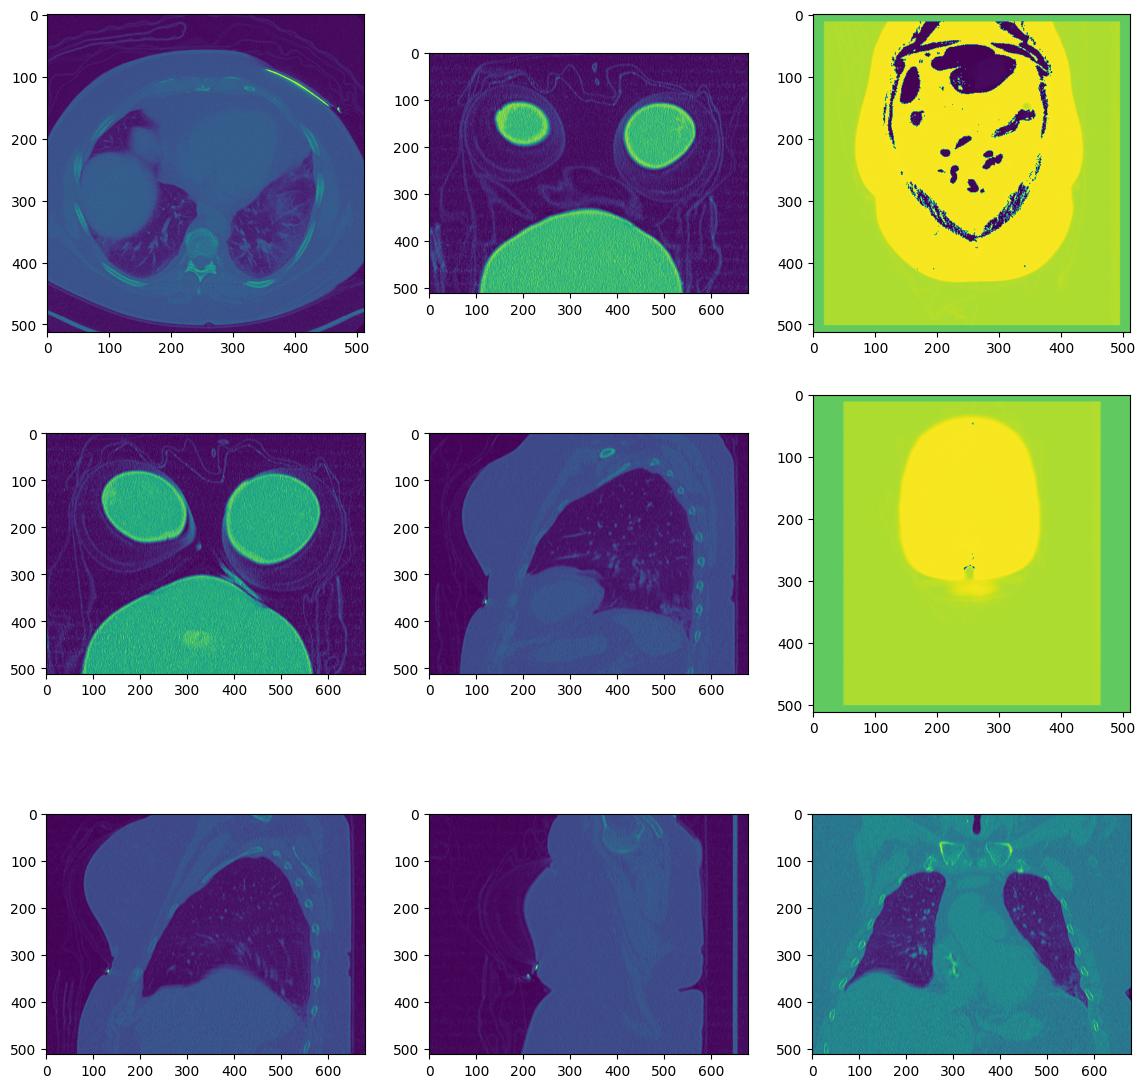

In [39]:
random_9img_sample(image_path)

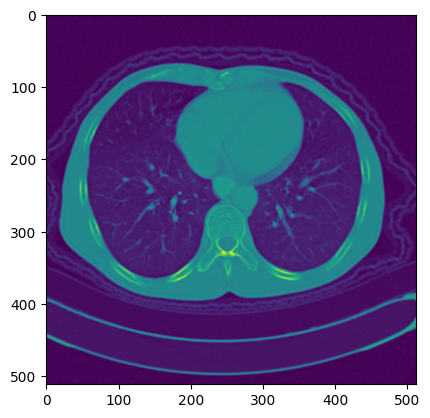

In [47]:
test_image = 'datasets/sklerosis/manifest-1709513138035/CMB-CRC/CMB-CRC-MSB-00352/12-19-1959-NA-PETCTSkullMidThigh-97248/11.000000-sag lung-58266/1-074.dcm'
dcm_img = show_image(test_image)

In [48]:
dcm_img

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 206
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.197330249480515651730160191242200934497
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.3.6.1.4.1.22213.1.143
(0002, 0013) Implementation Version Name         SH: '0.5'
(0002, 0016) Source Application Entity Title     AE: 'POSDA'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL', 'CT_SOM5 SPI']
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.2.1.1